In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
chars = pd.read_csv('../src/features/counts.csv')
chars.sort_values('count')

,char,count
46,á,1
131,😀,1
48,ī,1
14,Ⅸ,1
13,È,1
97,♟,1
53,è,1
137,ï,1
47,Ⅶ,1
9,ä,1


In [3]:
sum(chars['count'].values)

6050442

In [4]:
chars.describe()

,count
count,146.000000
mean,41441.383562
std,112053.038263
min,1.000000
25%,5.500000
50%,2401.000000
75%,15468.500000
max,881319.000000


(array([128.,   7.,   2.,   6.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([1.000000e+00, 8.813280e+04, 1.762646e+05, 2.643964e+05,
        3.525282e+05, 4.406600e+05, 5.287918e+05, 6.169236e+05,
        7.050554e+05, 7.931872e+05, 8.813190e+05]),
 <a list of 10 Patch objects>)

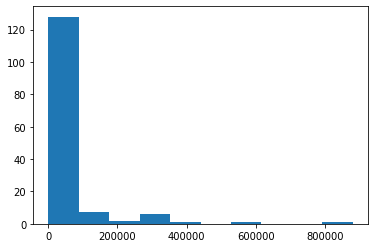

In [5]:
plt.hist(chars['count'].values)

Clearly, there is a severe skew in the frequency of these characters. 25 % of the characters appear less than 6 times!
We need to discard characters than occur infrequently. However, if we discard too many characters, we will oversimplify the learning challenge. 

Let's look at some characters with low frequency

In [6]:
def trim_chars(cutoff):
    print(chars[chars['count'] <= cutoff].sort_values('count'))
trim_chars(2405)

    char  count
47     Ⅶ      1
48     ī      1
86     Í      1
88     Ⅰ      1
23     σ      1
45     à      1
46     á      1
97     ♟      1
53     è      1
106    ā      1
13     È      1
112    Ü      1
9      ä      1
116    É      1
121    ñ      1
131    😀      1
137    ï      1
14     Ⅸ      1
32     😉      1
73     €      2
93     K      2
57     ♞      2
96     τ      2
142    ı      2
19     İ      2
109    ü      3
65     ²      3
24     μ      3
8      ê      3
105    ſ      3
..   ...    ...
128    ~     88
62     …    145
63     ^    166
70     @    287
12     &    294
110    $    366
118    –    380
52     ‘    414
76     J    498
25     !    526
21     Z    707
28     Q    713
104    |    771
141    ?    876
1      }   1160
123    {   1167
81     %   1178
78     X   1273
2      <   1325
77     K   1387
72     “   1465
27     ”   1472
91         1620
82     \   1628
95     V   1640
80     +   1650
35     —   1704
133    Y   1999
56     #   2290
136    7   2311

[73 row

By inspection, it looks like characters with a frequency of 88 are still relevant. Let's repeat our trick.

In [7]:
trim_chars(88)

    char  count
46     á      1
86     Í      1
137    ï      1
97     ♟      1
53     è      1
106    ā      1
48     ī      1
47     Ⅶ      1
45     à      1
32     😉      1
88     Ⅰ      1
23     σ      1
112    Ü      1
116    É      1
14     Ⅸ      1
13     È      1
9      ä      1
121    ñ      1
131    😀      1
93     K      2
19     İ      2
57     ♞      2
73     €      2
96     τ      2
142    ı      2
105    ſ      3
109    ü      3
65     ²      3
24     μ      3
8      ê      3
87     ß      4
22     ç      4
113    Ł      4
89     −      4
51     ö      5
7      π      5
6      ±      5
64     ©      7
100    ‣     10
18     ∞     10
50     →     13
120    é     13
74     `     65
128    ~     88


Again, by inspection, these characters are (generally) rarely occurring. We might want to keep the capital 'K', and the hyphen ('-'). For now, we will simply reject everything with frequency less than 14.

In [8]:
relevant_chars = chars[chars['count'] >= 14]
relevant_chars = relevant_chars.sort_values('count', ascending=False)
relevant_chars.head()

,char,count
132,,881319
43,e,562492
75,t,418978
124,a,318681
84,o,312847


In [9]:
relevant_chars['indices'] = [i+1 for i in range(len(relevant_chars))]

In [10]:
relevant_chars.head()

,char,count,indices
132,,881319,1
43,e,562492,2
75,t,418978,3
124,a,318681,4
84,o,312847,5


In [11]:
relevant_chars = relevant_chars.drop('count', axis=1)
relevant_chars.to_csv("../src/features/char_int_map.csv", index=False)